<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/nyandwi/machine_learning_complete/blob/main/8_deep_computer_vision_with_tensorflow/1_intro_to_computer_vision_and_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

*This notebook was created by [Jean de Dieu Nyandwi](https://twitter.com/jeande_d) for the love of machine learning community. For any feedback, errors or suggestion, he can be reached on email (johnjw7084 at gmail dot com), [Twitter](https://twitter.com/jeande_d), or [LinkedIn](https://linkedin.com/in/nyandwi).*

<a name='0'></a>
# Intro to Computer Vision and Convolutional Neural Networks(CNN)

### Contents 

* [1. Intro to Computer Vision with Convolutional Neural Networks(CNN)](#1)

   * [What is Convolutional Neural Networks?](#1-1)
   * [A Typical Architecture of Convolutional Neural Networks](#1-2)
* [2. Coding ConvNets: Image Classification](#2)
   * [2.1 Loading the Data](#2-1)
   * [2.2 Looking in the Data](#2-2)
   * [2.3 Preparing the data for a Model](#2-3)
   * [2.4 Creating, Compiling and Training a Model](#2-4)
   * [2.5 Visualizing the Model Results](#2-5)
   * [2.6 Evaluating the Model](#2-6)
   * [2.7 Improving a Model](#2-7)
   * [2.8 Saving and Loading](#2-8) 

* [3. Further Learning](#3)

<a name='1'></a>
## Intro to Computer Vision with Convolutional Neural Networks

We humans we are blessed to have got the ability to interact with the real world, and make sense of things around us. With our natural vision/perception, it takes us a fractions of milliseconds to see something and quickly tell what it is. 

Computers are not like that. It is extremely hard for a machine to interact with the external environment. Thankfully, due to the advent of computation power, availability of datasets, advance in intelligent tools like TensorFlow/PyTorch, and active researchers who always surprises day after day, a number of techniques and architectures to help a machine to see the real world have been emerged. 

One of the neural networks architectures that has accelerated various computer vision applications, from image recognition, image segmentation to object detection is `Convolutional Neural Networks(CNN)`, a.k.a `ConvNets`.

CNN overcomes some of the challenges of using fully connected network(or densely connected networks) in image tasks. Fully connected networks doesn't hold spatial features, and they have many parameters which can complicate the network and thus hindering its performance. 


<a name='1-1'></a>
## What is Convolutional Neural Networks(CNN)?

Convolutional Neural Networks is a neural network architecture used to exract features in data(images mosty). One special thing about CNN (that make it different to other neural networks types) is that it uses convolutional filters to extract features in images. 

Convolutional Neural Networks were inspired by the human's brain [visual cortex, an area in brain that process visual information](https://en.wikipedia.org/wiki/Visual_cortex). Up to now, they are on top of many applications: image and video classification, image search, [driveless cars](https://www.youtube.com/watch?v=CerTu2-FzFw) and other autonomous vehicles, medical images diagnosis, inteligent robots, and much more.

<a name='1-2'></a>
### A Typical Architecture of Convolutional Neural Networks 

CNN is made of 3 main layers, in sequential order: 

* **Convolutional layer**
* **Pooling layer**
* **Fully connected layer**

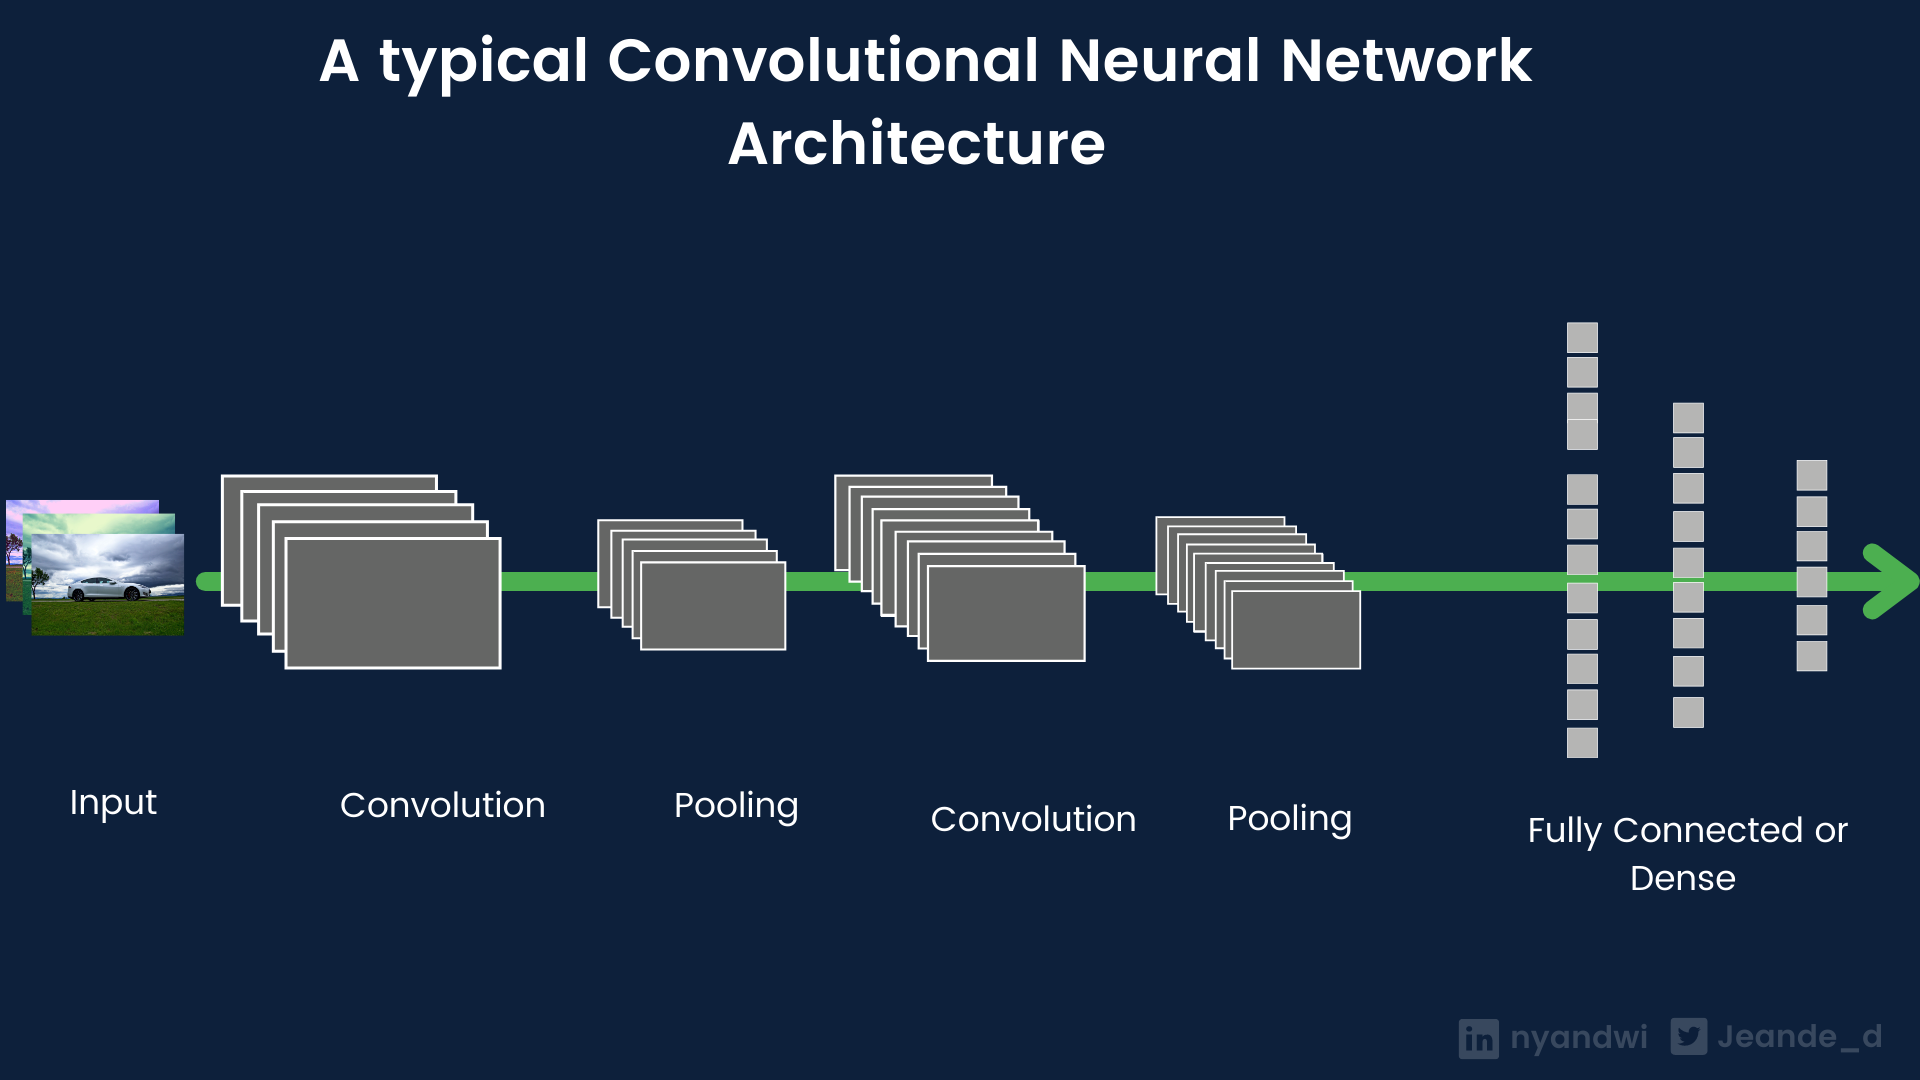



Let's talk about each layer. 

#### 1. Convolutional layers

The convolution layers are the backbone of the whole CNN. They are used to extract the features in the images using filters. These filters learn both low-level features such as lines, edges and high-level features such as the face, ear, nose, etc...High-level features are what later become useful during image recognition.

The process of convolution is that we pass the filter to each pixel in an image, we multiply the corresponding pixels and then we calculate the sum, such sum making the new pixel. We repeat the process until the filter is slid over all image pixels.

*The image below summarizes how convolutional operation is done*

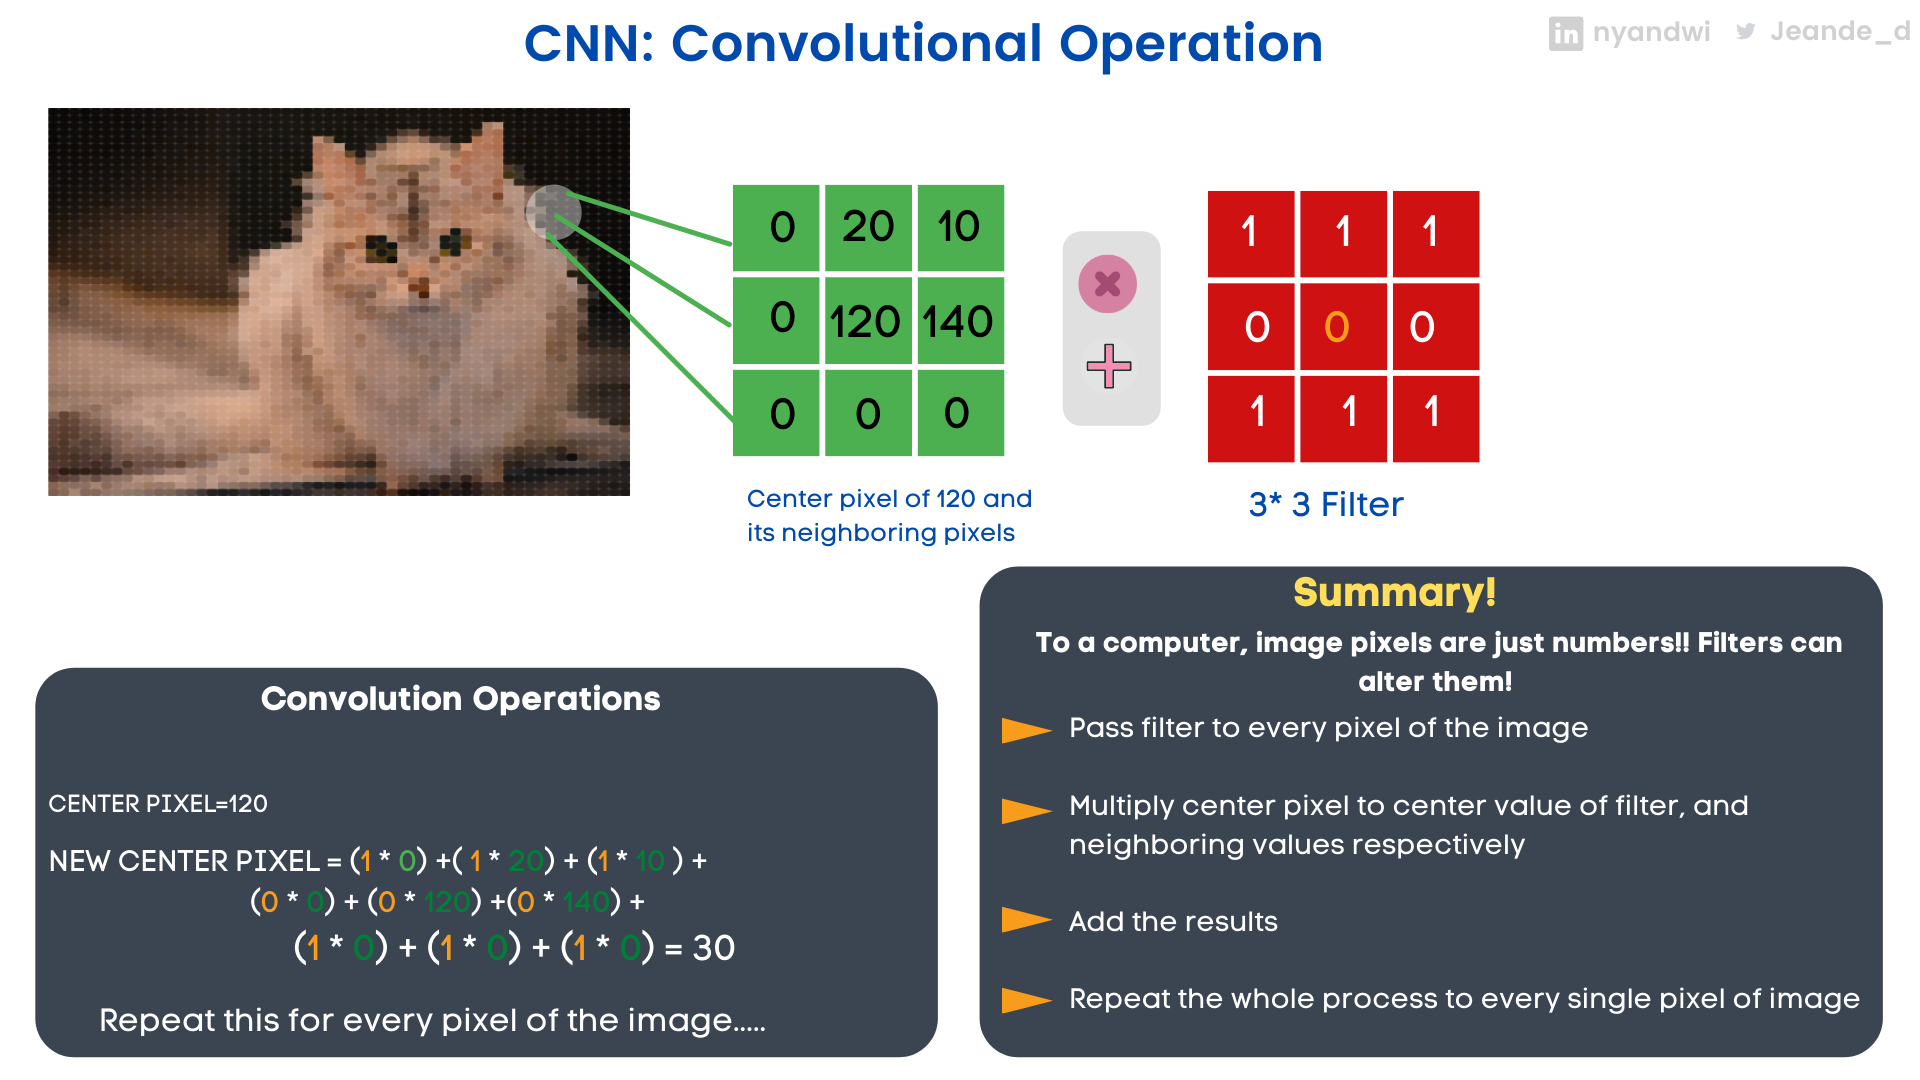

Most popular deep learning frameworks such as TensorFlow or PyTorch allow you to create the convolutional layer in one line of code. 

```
tf.keras.layers.Conv2D(.....)
```

The output of the convolutional layer will be high dimensional feature maps and its dimension will depend on the number of filters we have in a layer. Take an example, if the layer has 32 filters, then you will have 32 feature maps at the output. 

The more the filters, the many features maps you will have and that's not cool. How do we reduce the dimensions of feature maps while retaining as much as information in the image? Such question brings me to pooling layers.

#### 2. Pooling layers

Pooling layers are used to compress or shrink the feature maps. There are various pooling options but to preserve the best part of the images, Maxpooling is used. It will reduce the image size by keeping the highest pixels of the image. 

Implementing a pooling layer in many framework is very simple..

```
tf.keras.layers.MaxPooling2D(...)
```

The output of the pooling layers is reduced size feature maps. How does the network make sense of what these features represent? 

#### 3. Fully connected layers/Dense layers

At the end of the ConvNets, there is always going to be a fully connected layer whose job is to match the produced feature maps from the pooling layer with the exact labels of the original image.

Take an example. If the input image to a ConvNet layer is a human, the high-level features will be something like ear, noses, eye, face, etc. Once the neural network has learned that, these features will need to be matched to their labels. That is what fully connected layers do. 

FC layers are typically dense layers, activated with either `softmax` or `sigmoid` activation depending on the problem. 

```
tf.keras.layers.Dense(....)
```

A ConvNets may have multiple blocks of convolutional and pooling layers. The right number of these layers will depend on the scope of the work at hand and the size of the dataset.

<a name='2'></a>

## 2. Coding ConvNets: Image Classification

Image recognition is one of the common tasks in computer vision. We may be given two or more images, in two or more categories/classes and the task be to recognize them. 

In this notebook, we are going to practice ConvNets on classical dataset called `cifar10`. 

CIFAR-10 consists of 60000 colour images, in 10 classes or categories, and the good thing is that the dataset is quite balanced - each class contains 6000 images. 50.000 images are allocated for training, and 10.000 for test. 

Those 10 classes are: `airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck`.

You can learn more about the dataset [here](https://www.cs.toronto.edu/%7Ekriz/cifar.html). 

Although we will use cifar-10, there is a big version of cifar (cifar-100) with 100 classes. 

Cifar-10 is available in [Keras built in datasets](https://keras.io/api/datasets/cifar10/) and [TensorFlow datasets](https://www.tensorflow.org/datasets/catalog/cifar10). 

<a name='2-1'></a>

## 2.1 Loading the Data

While it could easier to load the data from Keras, let's use TensorFlow datasets this time. 

We will learn along the way, and also, since TF datasets is adding many datasets, let's familiarize ourselves with how to use TensorFlow datasets. 

### Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Print the version of tf, and tfds

print("TensorFlow's version used in notebook:{}".format(tf.__version__))
print("TensorFlow datasets's version used in notebook:{}".format(tfds.__version__))

TensorFlow's version used in notebook:2.5.0
TensorFlow datasets's version used in notebook:4.0.1


Below is how you would laod cifar-10 dataset from keras built in datasets. 

In [ ]:
# (train_data, train_label), (test_data, test_label) = keras.datasets.cifar10.load_data()

And here is how to load the data from TensorFlow datasets. 

Here are few notes about loading data with `tfds.load(...)`

* The first thing to be provided while loading the dataset, it is the name of such dataset. The names are pretty clear in [TFDS catalog](https://www.tensorflow.org/datasets/catalog/overview). 
* We can directly split the data into training and test with `split` argument. With `split=['train', 'test[:50%]','test[50%:]']`, full train is assigned to training data, and 50% of test set is allocated to validation set. 

A quick note about these 3 sets: training set is used for training the model, validation set is for evaluating the model during training, and test set is a new data that we use to test the model. In the real world projects, validation set should have the same distribution as test set. 

* Setting `as_supervised` to true will return a tuple of image and label`(image, label)`instead of a dictionary`({'image': img, 'label': label})`.

* And `with_info=True` will return the information of the concerned dataset. 

In [ ]:
(train_data, val_data, test_data), info = tfds.load('cifar10', 
                                          split=['train', 'test[:50%]','test[50%:]'],
                                          as_supervised=True, 
                                          shuffle_files=False,
                                          with_info=True
)


Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteDB9DNF/cifar10-train.tfrecord



Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteDB9DNF/cifar10-test.tfrecord


Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


We can see the dataset size by....

In [ ]:
print("The number images in training set: {}".format(len(train_data)))
print("The number images in validation set: {}".format(len(val_data)))
print("The number images in test set: {}".format(len(test_data)))

The number images in training set: 50000
The number images in validation set: 5000
The number images in test set: 5000


Or use `info` to get number of examples. 

In [ ]:
# Getting the number of examples 

info.splits['train'].num_examples

50000

In [ ]:
# Getting the number of examples 

info.splits['test'].num_examples

10000

Let's also get class names from `info.features`

In [ ]:
# getting class names

info.features['label'].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
# Number of classes

info.features['label'].num_classes

10

Now that the data is loaded, let's visualize some images. It's always a cool thing to do. 

<a name='2-2'></a>

## 2.2 Looking in Images

As always, it's good to peep in images and see if there are images that are labelled incorrectly, or have an extenstion of `.pdf` when in fact all images should be `.png` or `jpg.`

As you might guess, TensorFlow datasets are remarkably prepared, but in real life, incorrect labelling and formats can exist. 

Let's use `tfds.visualization(..)` to visualize some images. 

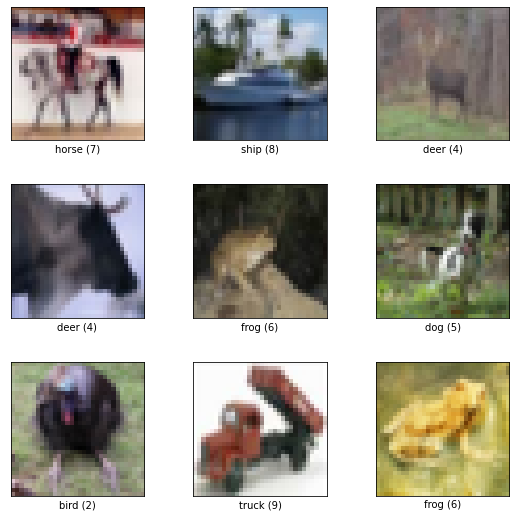

In [ ]:
fig = tfds.show_examples(train_data, info)

<a name='2-3'></a>

## 2.3 Preparing Data: Building a Training Pipeline

Now, let's prepare the data, specifically, building an input pipeline.

First, the tensorflow datasets are returned as `uint8`, we need to normalize the images while also converting it to `float32`.

In [ ]:
def preprocess(image, label):

  """ 
  Take image and label, 
  convert images to float32, and return converted image &label
  """

  normalized_img = tf.cast(image, tf.float32)/255.0

  return normalized_img, label


Now, we can apply the above function to the dataset with `map`. Along the way, we will shuffle it, and batch the images. 

We do not shuffle the test set. 

In [ ]:
def train_data_prep(data, shuffle_size, batch_size):

  data = data.map(preprocess)
  data = data.cache()
  data = data.shuffle(shuffle_size).repeat()
  data = data.batch(batch_size)
  data = data.prefetch(1)

  return data

Let's do the same thing for test, but on test, we will not shuffle the images. 

In [ ]:
def test_data_prep(data, batch_size):

  data = data.map(preprocess)
  data = data.batch(batch_size)
  data = data.cache()
  data = data.prefetch(1)

  return data

In [ ]:
train_data_prepared = train_data_prep(train_data, 1000, 32)

In [ ]:
test_data_prepared = test_data_prep(test_data, 32)

Validation set is also preprocessed as test set. So, we can use `test_data_prep` on validation set. 

In [ ]:
val_data_prepared = test_data_prep(val_data, 32)

Now, we have training and test data that are fully prepared to be fed to a ConvNets. 

<a name='2-4'></a>

## 2.4 Creating, Compiling and Training a Model

To recall what we saw at the beginning, a Convolutional Neural Network is made of 3 main layers:

* **Convolutional layers** for extracting features in image and returning feature maps

Below are the arguments that Convolutional layer has in TensorFlow:

```
* filters: Number of filters in the layer. It can be compared to number of units in dense layers. 
* kernel_size: A tuple of two integer specifying the height and width of each filter. Setting kernel_size=3, and kernel_size=(3,3), they are all the same. 
* activation: activation function to use. In most cases, try relu! 

```
Learn more about other arguments in Conv2D at [keras.io](https://keras.io/api/layers/convolution_layers/convolution2d/). 

* **Pooling layers** for shrinking/compressing feature maps. We specify the pooling size with `pool_size` argument. 

```tf.keras.layers.MaxPooling2D(pool_size=2)```

* And **Fully Connected Layers** for doing the rest: matching the compressed features maps to their labels.


***Other notes***:

* Before compiling and training, a TensorFlow model is an empty graph(we will plot it)
* When compiling the model, it is where we specify the loss function and optimizer. Loss/cost function is there to calculate the distance between prediction and actual output and optimizer is there to reduce such distance. 

In our problem, we have 10 classes. Our loss is [`sparse_categorical_crossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy) and we can use [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) optimizer since it work well for many problems. 

* Training the model is nothing other than feeding the data(image and their labels) to the model. We specify the number of iterations the training has to happen, and also we will allocate `0.15 of training dataset to validation set` with `validation_split=0.15`. 

Now that we understand everything we are going to do, let's build the model, compile it, and train it. 

One last thing: cifar-10 images are 32*32, and are colored. So the input shape is `(32, 32, 3)`. Also, as we have 10 classes, the output neurons will be 10, activated by a `softmax` activation function. 

In [ ]:
input_shape = [32,32,3]


cifar_cnn = tf.keras.models.Sequential([
    # First Convolutional layer: 64 filters, kernel/filter size of 3

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),
  
    # First Pooling layer
    tf.keras.layers.MaxPooling2D(pool_size=2),

    # Second Convolutional layer & Pooling

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    # Third Convolutional & Pooling layer

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    # Flattening layer: For converting previous output into 1D column vector

    tf.keras.layers.Flatten(),

    # Fully Connected layers

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),

    # Last layer: 10 neurons for 10 classes, activated by softmax
    tf.keras.layers.Dense(units=10, activation='softmax')

])

Now that our model is created, we can peep into its architecture with `cifar_cnn.summary()`.

In [ ]:
# Model summary

cifar_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 256)         295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

We can also plot it with `tf.keras.utils.plot_model(...)`

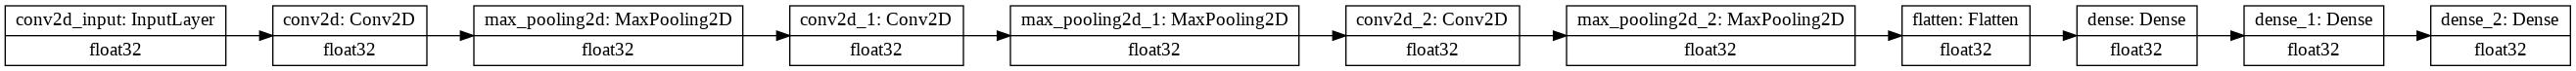

In [ ]:
tf.keras.utils.plot_model(cifar_cnn, rankdir='LR',show_dtype=True)

We can compile the model now...

In [ ]:
cifar_cnn.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

And here we train the model. For quick training, I will enable GPU. In Google Colab, GPU can be enabled by heading to `Runtime` in menu bar, go to  `Change runtime`, and in `hardware accelerator`, choose `GPU`. 

Thanks to Colab, we can train deep computer vision models fast than it could take on ordinary machines!! 

In [ ]:
batch_size = 32
train_size = info.splits["train"].num_examples

val_size = len(val_data_prepared)


train_steps = int(train_size/batch_size)
val_steps = int(val_size/batch_size)

model_history = cifar_cnn.fit(train_data_prepared, 
              validation_data=val_data_prepared,
              epochs=9,
              steps_per_epoch=train_steps,
              validation_steps=val_steps)

Epoch 1/9
1562/1562 [==============================] - 8s 5ms/step - loss: 1.0155 - accuracy: 0.6438 - val_loss: 1.1868 - val_accuracy: 0.5859
Epoch 2/9
1562/1562 [==============================] - 8s 5ms/step - loss: 0.8516 - accuracy: 0.7007 - val_loss: 0.9781 - val_accuracy: 0.6484
Epoch 3/9
1562/1562 [==============================] - 8s 5ms/step - loss: 0.7368 - accuracy: 0.7428 - val_loss: 0.9412 - val_accuracy: 0.6797
Epoch 4/9
1562/1562 [==============================] - 8s 5ms/step - loss: 0.6447 - accuracy: 0.7745 - val_loss: 0.8999 - val_accuracy: 0.6719
Epoch 5/9
1562/1562 [==============================] - 7s 5ms/step - loss: 0.5623 - accuracy: 0.8032 - val_loss: 0.9244 - val_accuracy: 0.6641
Epoch 6/9
1562/1562 [==============================] - 7s 5ms/step - loss: 0.5041 - accuracy: 0.8230 - val_loss: 1.0261 - val_accuracy: 0.6953
Epoch 7/9
1562/1562 [==============================] - 7s 5ms/step - loss: 0.4413 - accuracy: 0.8441 - val_loss: 1.0780 - val_accuracy: 0.6562

Now that our model is trained, let's visualize the resulting metrics: loss and accuracy during training and validation. 

<a name='2-5'></a>

## 2.5 Visualizing the Model Results

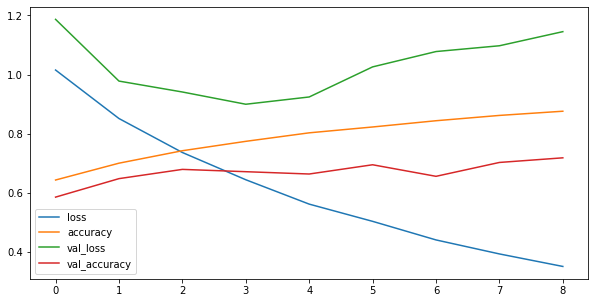

In [ ]:
import pandas as pd
 
 # Getting the model training history
model_history = model_history.history

# Model history into a pandas dataframe
loss_acc_df = pd.DataFrame(model_history)

# Plotting the loss and accuracy 

loss_acc_df.plot(figsize=(10,5))

Let's elaborate the plot more by plotting the loss accuracy separately. 

In [ ]:
acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = cifar_cnn.history.epoch

# function to plot accuracy 

def plot_acc(acc, val_acc, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, acc, 'r', label='Training Accuracy')
  plt.plot(epochs, val_acc, 'g', label='Validation Accuracy')
  plt.title('Training and validation accuracy')
  plt.legend(loc=0)
  plt.figure()

def plot_loss(loss, val_loss, epochs):

  plt.figure(figsize=(10,5))
  plt.plot(epochs, loss, 'b', label='Training Loss')
  plt.plot(epochs, val_loss, 'y', label='Validation Loss')
  plt.title('Training and Validation Loss')
  plt.legend(loc=0)
  plt.figure()

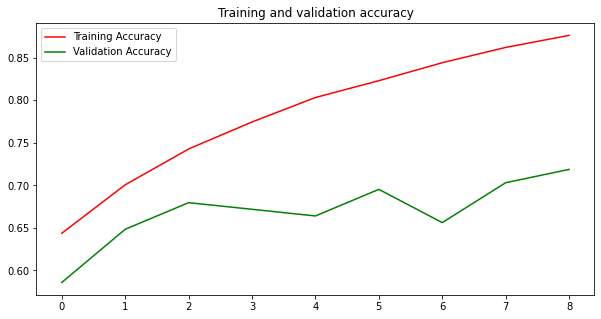

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plotting acc

plot_acc(acc, val_acc, epochs)

Looking at the plot above, it seems that the model is overfitting. 

Overfitting happens when the model is doing well on the training set but can't have the same performance on validation data. 

Overfitting can be avoided by adding more data and regularizing the model. In later section, we will add [reguralization layers](https://keras.io/api/layers/regularization_layers/) such as [Dropout](https://keras.io/api/layers/regularization_layers/dropout/). 

Overfitting can also be reduced by stopping the training early. This happens when you train for many epochs, but in our case, we trained for 9 epochs. This is not an issue here, but if we had to bet the epochs, [early stopping](https://keras.io/api/callbacks/early_stopping/) can help to stop the model training when there is no improvements in the results.

Let's plot the loss.

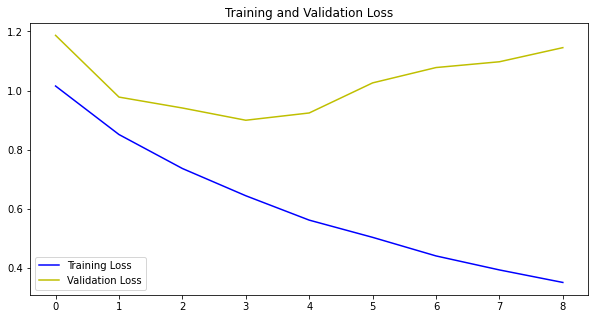

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_loss(loss, val_loss, epochs)

The training loss kept decreasing as it should, but the validation loss started to diverge at the third epoch. 

In the next section, we are going to attempt improving the model. 

<a name='2-6'></a>

## 2.6 Improving the Model

We are going to do two things to improve the model. 

First, I will increase validation images. Currently, they are 5000, it is 10% of the training set. I will double it. 

Another thing to try is to tweak the model layers. One would use tools like [Keras Tuner](https://keras.io/keras_tuner/) to search the optimal number of filters, etc, but for now, we will add dropout layer. 

The idea of [dropout](https://keras.io/api/layers/regularization_layers/dropout/) is very simple: During the training, at each iteration, a given number of neurons are randomly disabled. This can increase both performance and generalization of the neural network. Learn more about this art [here](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/). 



In [ ]:
# reloading the data

# Training set = 80% of orginal training set (50,000 images)
# Validation set = 20% of training set = 10,000 images
# Test set = full orginal test set = 10,000 images

(train_data, val_data, test_data), info = tfds.load('cifar10', 
                                          split=['train[:80%]', 'train[80%:]','test'],
                                          as_supervised=True, 
                                          shuffle_files=True,
                                          with_info=True
)

Let's preprocess these 3 sets with the functions that we defined at the beginning. 

In [ ]:
train_final = train_data_prep(train_data, 1000, 32)

val_final = test_data_prep(val_data, 32)
test_final = test_data_prep(test_data, 32)

Now, we can redefine the model. 

In [ ]:
input_shape = [32,32,3]

cifar_cnn_2 = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), padding='same',  activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(units=10, activation='softmax')

])

# Nadam optimizer is a version of adam

cifar_cnn_2.compile(loss='sparse_categorical_crossentropy',
                    optimizer='nadam',
                    metrics='accuracy')

In [ ]:
# Training the model for 10 epochs

batch_size = 32
train_size = 40000
val_size = 10000


train_steps = int(train_size/batch_size)
val_steps = int(val_size/batch_size)

model_history_2 = cifar_cnn_2.fit(train_final, 
              validation_data=val_final,
              epochs=10,
              steps_per_epoch=train_steps,
              validation_steps=val_steps)

Epoch 1/10
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6176 - accuracy: 0.4100 - val_loss: 1.2067 - val_accuracy: 0.5677
Epoch 2/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.2107 - accuracy: 0.5696 - val_loss: 0.9822 - val_accuracy: 0.6585
Epoch 3/10
1250/1250 [==============================] - 7s 6ms/step - loss: 1.0364 - accuracy: 0.6356 - val_loss: 0.8793 - val_accuracy: 0.6897
Epoch 4/10
1250/1250 [==============================] - 7s 6ms/step - loss: 0.9407 - accuracy: 0.6689 - val_loss: 0.7914 - val_accuracy: 0.7224
Epoch 5/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8663 - accuracy: 0.7006 - val_loss: 0.7671 - val_accuracy: 0.7341
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.8183 - accuracy: 0.7145 - val_loss: 0.7386 - val_accuracy: 0.7490
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.7659 - accuracy: 0.7297 - val_loss: 0.7462 - val_accuracy:

Seems that the difference between val and training accuracy is not as high as it was. 

Let's plot loss and accuracy. 

In [ ]:
model_history = model_history_2.history

acc = model_history['accuracy']
val_acc = model_history['val_accuracy']
loss = model_history['loss']
val_loss = model_history['val_loss']

epochs = model_history_2.epoch

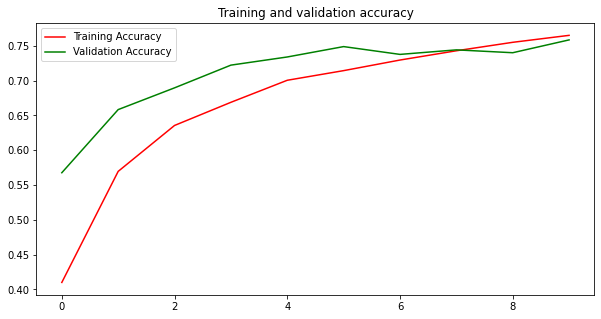

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot accuracy 

plot_acc(acc, val_acc, epochs)

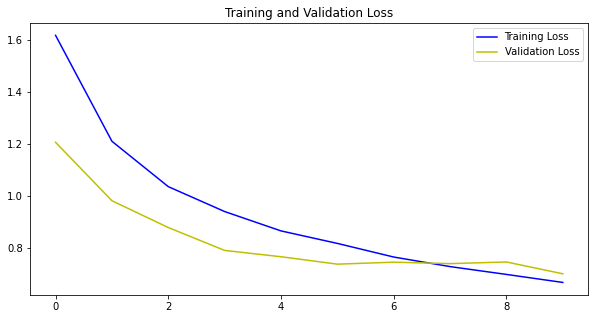

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot loss 

plot_loss(loss, val_loss, epochs)

This is much better. We only trained for 10 epochs and it seems that the loss was still decreasing. 

Dropout is remarkably one of the powerful regularization technique. 

If you are seeing this, here is a challenge: I have only used dropout to avoid overfitting. What else can be done to avoid overfitting? Data augmentation?

<a name='2-7'></a>

## 2.7 Evaluating on Test set

In [ ]:
# Evaluating a model on test set 

loss, acc = cifar_cnn_2.evaluate(test_final)

313/313 [==============================] - 2s 7ms/step - loss: 0.7157 - accuracy: 0.7552


In [ ]:
# Print loss and acc with 3 only decimal points

print('Test Loss: {:.3f}'.format(loss))
print('Test Accuracy: {:.3f}'.format(acc))

Test Loss: 0.716
Test Accuracy: 0.755


Test set is a new data to the model, but as you can see, the accuracy is not really bad, given that the training accuracy is 76%. 

<a name='2-8'></a>

## 2.8 Saving and Loading the Model for Prediction

In [ ]:
# Saving a model

cifar_cnn_2.save('Cifar Best.h5')

In [ ]:
# Loading a saved model
from keras.models import load_model

load_cifar = load_model('Cifar Best.h5')

In [ ]:
load_cifar.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4096)             

This is the end of the lab. We have learned alot, from intro to CNN and what they are made of, to practicing it on a real world dataset. 

We aso learned how to use TensorFlow datasets. There are many more open source datasets that you can practice on to develop more intuition about machine learning. 

For futher learning, check the following courses. 

<a name='3'></a>

## 3 Further Learning

The following are the most recommended courses to learn more about machine learning basics and computer vision

* [Google Machine Learning Crash Course](https://developers.google.com/machine-learning/crash-course) for foundations of Machine Learning

* [Intro to Deep Learning MIT (Lecture 1 and 3)](http://introtodeeplearning.com) for quick foundations of Deep Learning and Deep Computer Vision

* [Deep Learning Specialization, Andrew Ng](https://www.deeplearning.ai/program/deep-learning-specialization/). This is a great course to give you indepth foundations of Deep Learning. [Free on YouTube](https://www.youtube.com/playlist?list=PLkDaE6sCZn6Gl29AoE31iwdVwSG-KnDzF). 

* [Fast.AI Practical Deep Learning for Coders](https://course.fast.ai). This is the best in class course (very practical and has a high community ratings). 